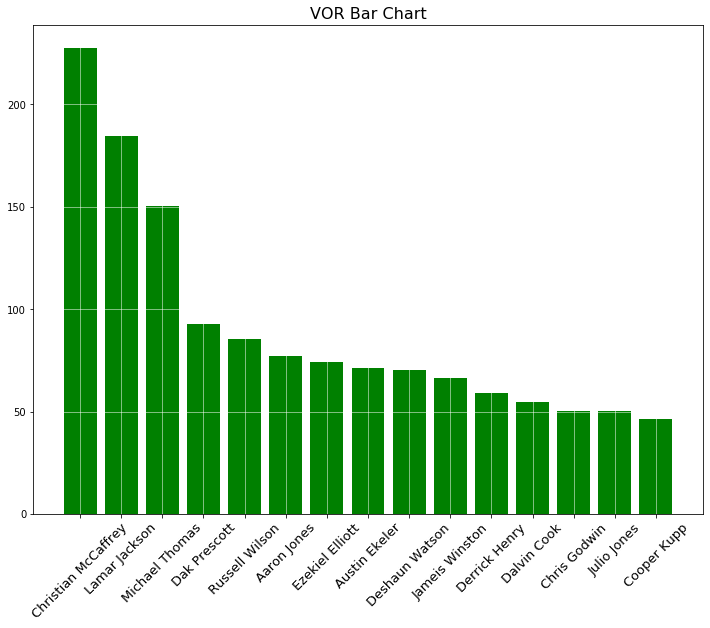

,Player,FantPos,FantasyPoints,VOR
0,Christian McCaffrey,RB,469.20,227.591538
1,Lamar Jackson,QB,491.68,184.755172
6,Michael Thomas,WR,374.60,150.595789
11,Dak Prescott,QB,399.78,92.855172
13,Russell Wilson,QB,392.60,85.675172
3,Aaron Jones,RB,318.80,77.191538
4,Ezekiel Elliott,RB,315.70,74.091538
9,Austin Ekeler,RB,313.00,71.391538
17,Deshaun Watson,QB,376.98,70.055172
29,Jameis Winston,QB,373.36,66.435172


In [3]:
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt

df = pd.read_csv('2019.csv')
df.drop(['FDPt','DKPt','2PP'],axis =1, inplace= True)

df['Player'] = df['Player'].apply(lambda x:x.split('*')[0]).apply(lambda x:x.split('\\')[0])
df.rename({
    'TD': 'PassingTD',
    'TD.1': 'RushingTD',
    'TD.2': 'ReceivingTD',
    'TD.3': 'TotalTD',
    'Yds': 'PassingYDs',
    'Yds.1': 'RushingYDs',
    'Yds.2': 'ReceivingYDs',
    'Att': 'PassingAtt',
    'Att.1': 'RushingAtt'
}, axis=1, inplace=True)

df['FantasyPoints'] = df['PassingYDs']/25 + df['PassingTD']*6 - df['Int']*2 + df['Rec'] + df['ReceivingYDs']/10 + df['ReceivingTD']*6 + df['RushingYDs']/10 + df['RushingTD']*6

draftpoollimit = 100
def calculate_average_based_off_position(our_df, pos):
    return our_df[our_df['FantPos'] == pos]['FantasyPoints'].mean()

cabob = calculate_average_based_off_position

New_df = df.sort_values(by = ['FantasyPoints'], ascending = False)[:draftpoollimit]

qb_avg= cabob(New_df,'QB')
rb_avg= cabob(New_df,'RB')
wr_avg = cabob(New_df,'WR')
te_avg = cabob(New_df,'TE')


pos_replacement_vals = {
    'RB': rb_avg,
    'WR': wr_avg,
    'TE': te_avg,
    'QB': qb_avg
}


New_df = pd.DataFrame({}, columns=['Player', 'FantPos', 'FantasyPoints', 'VOR'])

for position, replacement_value in pos_replacement_vals.items():
    pos_df =df[df['FantPos']== position]
    pos_df = pos_df[['Player', 'FantPos', 'FantasyPoints']]
    pos_df['VOR'] = pos_df['FantasyPoints'] - replacement_value
    New_df = pd.concat([New_df, pos_df])
    
pltdf = New_df.sort_values(by=["VOR"], ascending=False)
pltdf = pltdf.head(15)

plt.figure(figsize = (12,9))
plt.bar(pltdf['Player'], pltdf['VOR'], color = 'Green')
plt.xticks(rotation = 45, fontsize = 13)
plt.title('VOR Bar Chart', fontsize = 16 )
plt.grid(color='w', linestyle='-', linewidth=.5)
plt.show()

New_df.sort_values(by=["VOR"], ascending=False).head(15)